## HomeWork_2

For this homework you will have to complete and implement the colour balancing for:

Gray world algorithm
Scale-by-max algorithm
You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing

In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

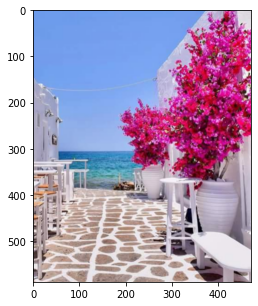

In [88]:
img = cv2.imread('data/greece.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch

In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x20fb4408>)

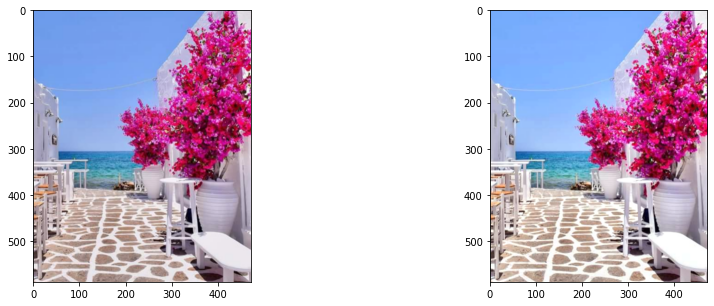

In [89]:
# Define white patch and the coefficients
row, col = 525, 440
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced_white_patch = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_white_patch[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced_white_patch[balanced_white_patch > 255.0] = 255.0

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_white_patch.astype('uint8'))

### Gray World

This algorithm assumes that a scene, on average, is gray.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x210a8ac8>)

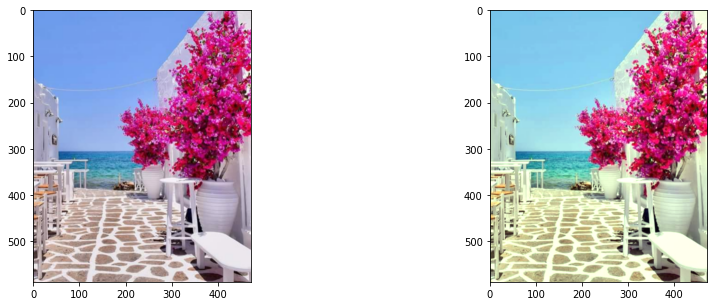

In [90]:
# Load your image
img = cv2.imread('data/greece.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the image into the three colour channels
red, green, blue = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(red)
mean_g = np.mean(green)
mean_b = np.mean(blue)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
max_mean = max(mean_r, mean_g, mean_b)

if(mean_r == max_mean):
    kr, kg, kb = 1.0, mean_r / mean_g, mean_r / mean_b
elif(mean_g == max_mean):
    kr, kg, kb = mean_g / mean_r, 1.0, mean_g / mean_b
else:
    kr, kg, kb = mean_b / mean_r, mean_b / mean_g, 1.0

# Apply color balancing and generate the balanced image
balanced_gr_wrld = np.zeros_like(img, dtype=np.float32)
balanced_gr_wrld = cv2.merge([red * kr, green * kg, blue * kb])
balanced_gr_wrld[balanced_gr_wrld > 255.0] = 255.0

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_gr_wrld.astype('uint8'))

### Scale-by-max

This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2345ef88>)

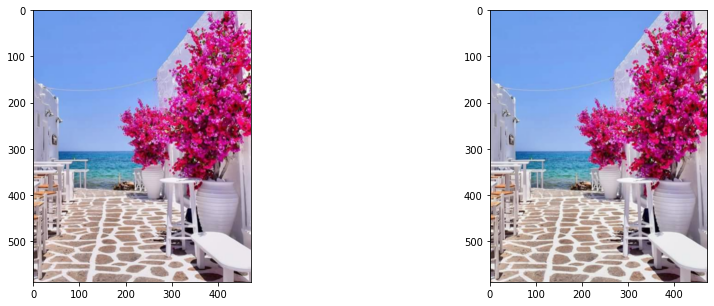

In [95]:
# Load your image
img = cv2.imread('data/greece.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split the image into the three colour channels
red, green, blue = cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(red)
max_g = np.max(green)
max_b = np.max(blue)

# Compute coefficients
kr, kg, kb = 255.0 / max_r, 255.0 / max_g, 255.0 / max_b

# Apply scale-by-max balancing and generate the balanced image
balanced_scale_by_max = np.zeros_like(img, dtype=np.float32)
balanced_scale_by_max = cv2.merge([red * kr, green * kg, blue * kb])
balanced_scale_by_max[balanced_scale_by_max > 255.0] = 255.0

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced_scale_by_max.astype('uint8'))

### Results comparison

(<AxesSubplot:title={'center':'Scale-by-max'}>,
 <matplotlib.image.AxesImage at 0x235a8608>)

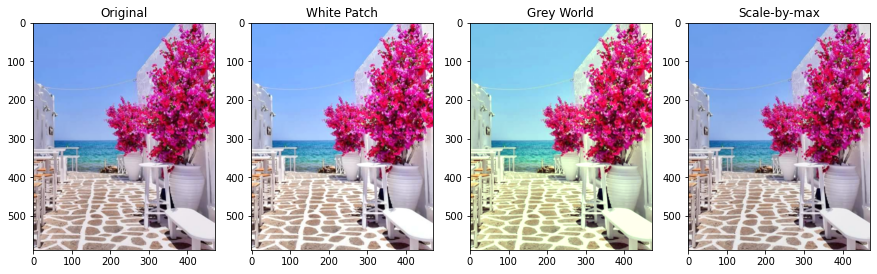

In [96]:
plt.subplot(141, title = "Original"), plt.imshow(img)
plt.subplot(142, title = "White Patch"), plt.imshow(balanced_white_patch.astype('uint8'))
plt.subplot(143, title = "Grey World"), plt.imshow(balanced_gr_wrld.astype('uint8'))
plt.subplot(144, title = "Scale-by-max"), plt.imshow(balanced_scale_by_max.astype('uint8'))

In [97]:
print(np.mean(img))
print(np.mean(balanced_white_patch.astype('uint8')))
print(np.mean(balanced_gr_wrld.astype('uint8')))
print(np.mean(balanced_scale_by_max.astype('uint8')))

159.71150830191937
172.5680076352719
176.30196253345227
160.50391715346322
